# Plotting Airport Zurich
Using the data to plott airport Zurich

## Importing
Importing libraries. Setting `%matplotlib inline` to plott the graph inside the notebook

In [14]:
%matplotlib inline

import pandas as pd
import geopandas
from shapely.geometry import Point, Polygon
import fiona

Importing CSV

In [15]:
df = pd.read_csv('../data_generated/20180521_sampled.csv')

## Plotting Airport Zurich
Transforming Data to a GeoDataFrame

In [16]:
geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
geo_df = geopandas.GeoDataFrame(df, crs={'init': 'epsg:4326'}, geometry=geometry)

Create a polygon around Zurich airport

In [17]:
# Airport Zurich
coords = [( 8.4994, 47.4863 ), ( 8.4994, 47.4283 ), ( 8.619, 47.4283 ), ( 8.619, 47.4863 ), ( 8.4994, 47.4863 )]
zurich_airport = Polygon(coords)

Selecting points inside the polygon

In [18]:
df_zurich = geo_df[geo_df.geometry.within(zurich_airport)]

Plott!

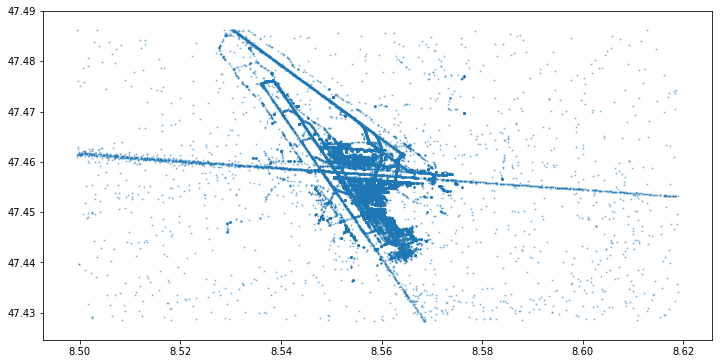

In [9]:
df_zurich.plot(figsize=(12, 12),markersize=1, alpha=0.4)

Export

In [20]:
export = df_zurich.drop(['alert', 'spi', 'onground'], axis=1)
export.to_file("../qgis/departures_zurich_all.shp")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():
CPLE_NotSupported in Normalized/laundered field name: 'ground_speed' to 'ground_spe'
CPLE_NotSupported in Normalized/laundered field name: 'vertical_rate' to 'vertical_r'
CPLE_NotSupported in Normalized/laundered field name: 'baro_altitude' to 'baro_altit'
CPLE_NotSupported in Normalized/laundered field name: 'last_position' to 'last_posit'


## Terminal
Zoom to a terminal - just for fun

Again, create a polygone

In [24]:
# Terminal
coords = [( 8.5482, 47.4636 ), ( 8.5482, 47.4582 ), ( 8.5625, 47.4582 ), ( 8.5625, 47.4636 ), ( 8.5482, 47.4636 )]
airport_terminal = Polygon(coords)

Just select dots on the ground.

In [25]:
geo_onground = geo_df[geo_df['onground'] == True]

Select points inside polygon and plott

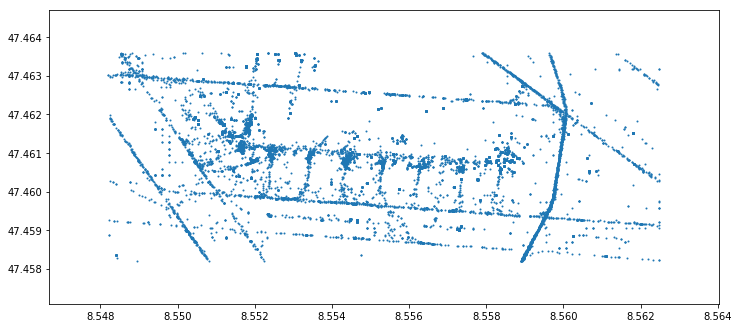

In [26]:
df_terminal = geo_onground[geo_onground.geometry.within(airport_terminal)]
df_terminal.plot(figsize=(12, 12), markersize=1)